<a href="https://colab.research.google.com/github/adkekisheva/-_-/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626472 sha256=a60f349cec4dfa57d9cc2e7edbd91ce1d994d1ad00c352ee2e8864b76859a42e
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [4]:
import os
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy

In [13]:
books_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=',', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
books = pd.read_csv('BX_Books.csv', sep=',', encoding='latin-1', error_bad_lines=False)

b'Skipping line 10824: expected 8 fields, saw 9\nSkipping line 14769: expected 8 fields, saw 9\nSkipping line 14936: expected 8 fields, saw 9\nSkipping line 15690: expected 8 fields, saw 10\nSkipping line 17320: expected 8 fields, saw 9\nSkipping line 18095: expected 8 fields, saw 9\nSkipping line 28443: expected 8 fields, saw 9\nSkipping line 33098: expected 8 fields, saw 9\nSkipping line 36394: expected 8 fields, saw 12\nSkipping line 42628: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 52174: expected 8 fields, saw 9\nSkipping line 56901: expected 8 fields, saw 10\nSkipping line 58600: expected 8 fields, saw 10\nSkipping line 60739: expected 8 fields, saw 10\n'
b'Skipping line 65756: expected 8 fields, saw 9\nSkipping line 67924: expected 8 fields, saw 9\nSkipping line 68134: expected 8 fields, saw 9\nSkipping line 70764: expected 8 fields, saw 11\nSkipping line 72572: expected 8 fields, saw 12\nSkipping line 74291: expected 8 fields, saw 9\

In [15]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [16]:
books_ratings.head()

UserID        ISBN  BookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6

In [ ]:
# books_books = pd.read_csv('BX_Books.csv')

In [17]:
books_ratings.UserID=books_ratings.UserID.astype(str)
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1149780 non-null  object
 1   ISBN        1149780 non-null  object
 2   BookRating  1149780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


In [18]:

reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 10.0))
df = Dataset.load_from_df(books_ratings, reader)

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# books_ratings.BookRating.unique()

In [ ]:
# !pip install plotly

In [20]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        
        
        '''))


In [22]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = books_ratings["BookRating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / books_ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(books_ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
     

In [23]:
configure_plotly_browser_state()


data = books_ratings.groupby('ISBN')['BookRating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [24]:
data.head()

ISBN
 0330299891    2
 0375404120    2
 0586045007    1
 9022906116    2
 9032803328    1
Name: BookRating, dtype: int64

In [25]:

configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [26]:
type(data)

pandas.core.series.Series

In [27]:
type(df)

surprise.dataset.DatasetAutoFolds

In [28]:

# param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
#               'reg_all': [0.08, 0.1, 0.15]}

param_grid = {'n_factors': [25], 'n_epochs': [15], 'lr_all': [0.001, 0.003],
              'reg_all': [0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose = 432)

gs.fit(df)

algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [29]:
print(gs.best_score['mae'])
print(gs.best_params['mae'])

2.862582067488773
{'n_factors': 25, 'n_epochs': 15, 'lr_all': 0.003, 'reg_all': 0.08}


In [30]:

trainset, testset = train_test_split(df, test_size=0.25)
algo = SVD(n_factors = 25, n_epochs = 15, lr_all = 0.003, reg_all = 0.1)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 3.4160


3.4159635542285645

Эмпирически проверено, что минимальная ошибка достигается при этих параметрах как следствие, модель наиболее оптимальна.

In [31]:
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)


In [32]:
df_predictions.head()

uid         iid   rui       est                    details    Iu   Ui  \
0  110973  055329461X   0.0  0.866344  {'was_impossible': False}  2301   32   
1  187517  0804111898   0.0  1.799459  {'was_impossible': False}   504   44   
2  209875  0553298062   8.0  2.673802  {'was_impossible': False}   164   11   
3   93871  0446608890   7.0  3.034324  {'was_impossible': False}     8  111   
4  136561  0393310485  10.0  5.180906  {'was_impossible': False}    13    1   

        err  
0  0.866344  
1  1.799459  
2  5.326198  
3  3.965676  
4  4.819094

In [33]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]


In [34]:
temp = books_ratings.loc[books_ratings['ISBN'] == '0195153448']['BookRating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [35]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []

    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1   

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)  

    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

threshold      tp      fp      tn     fn  Precision    Recall        F1
0         0.0  287445       0       0      0   1.000000  1.000000  1.000000
1         0.5  108337  179108       0      0   0.376896  1.000000  0.547458
2         1.0  105815  134735   44373   2522   0.439888  0.976721  0.606586
3         1.5  101465  111021   68540   6419   0.477514  0.940501  0.633424
4         2.0   95716   89824   89737  12168   0.515878  0.887212  0.652407
5         2.5   86436   70044  110201  20764   0.552377  0.806306  0.655613
6         3.0   67523   45116  135129  39677   0.599464  0.629879  0.614295
7         3.5   48605   27245  154491  57104   0.640804  0.459800  0.535418
8         4.0   34760   15553  166183  70949   0.690875  0.328827  0.445578
9         4.5   24297    8791  175229  79128   0.734315  0.234924  0.355966
10        5.0   17002    4854  179166  86423   0.777910  0.164390  0.271422

In [36]:



def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [37]:



results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.60839212074271, 'Recall': 0.8118938930038619},
 {'K': 3, 'Precision': 0.6069198188580232, 'Recall': 0.8492078348085564},
 {'K': 4, 'Precision': 0.6065063881155232, 'Recall': 0.8688942498453066},
 {'K': 5, 'Precision': 0.6059799180814003, 'Recall': 0.8806499255976313},
 {'K': 6, 'Precision': 0.605871065430212, 'Recall': 0.8888035867078714},
 {'K': 7, 'Precision': 0.6056133876799134, 'Recall': 0.8945677066256492},
 {'K': 8, 'Precision': 0.6054881622741829, 'Recall': 0.8987536448484},
 {'K': 9, 'Precision': 0.6052968560656267, 'Recall': 0.9019439600436124},
 {'K': 10, 'Precision': 0.6053008101149228, 'Recall': 0.9046256105712975}]

In [38]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


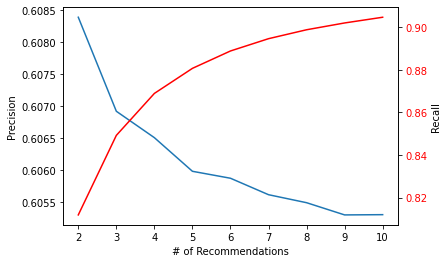

In [39]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')
    ###


In [40]:
trainset = df.build_full_trainset()   #Build on entire data set
testset = trainset.build_testset()
algo = SVD(n_factors= 25, n_epochs= 15, lr_all= 0.003, reg_all= 0.08)
algo.fit(trainset)
print('dknjdn')
# Predict ratings for all pairs (u, i) that are NOT in the training set.


print('dknjdn', 2)
#Predicting the ratings for testset
predictions = algo.test(testset)


dknjdn
dknjdn 2


In [41]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n


In [42]:
all_pred = get_all_predictions(predictions)

In [43]:
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
# print(all_pred.values()[0])

In [44]:
tmp = pd.DataFrame.from_dict(all_pred, orient='index')
# tmp_transpose = tmp.transpose()
tmp

0                                1  \
276725  (034545104X, 2.8631192574461157)                             None   
276726   (0155061224, 3.038782880249946)                             None   
276727   (0446520802, 3.788417582379905)                             None   
276729  (0521795028, 3.1853740916887836)  (052165615X, 3.056496291178173)   
276733   (2080674722, 2.888893170039268)                             None   
...                                  ...                              ...   
276704   (0743211383, 3.292289133350737)   (0446353957, 3.14931185044449)   
276706   (0679447156, 2.586902875139175)                             None   
276709   (0515107662, 4.616486103151562)                             None   
276721  (0590442449, 3.1313395800373387)                             None   
276723  (05162443314, 3.454131239328062)                             None   

                                      2                                3  
276725                             None                             None  
276726                             None                             None  
276727                             None                             None  
276729                             None                             None  
276733                             None                             None  
...                                 ...                              ...  
276704  (1563526298, 3.123389183469323)  (0312873115, 2.995712465501604)  
276706                             None                             None  
276709                             None                             None  
276721                             None                             None  
276723                             None                             None  

[105283 rows x 4 columns]

In [45]:

def get_predictions(user_id):
    results = tmp.loc[user_id]
    return results

In [46]:
results = get_predictions("276704")
results

0    (0743211383, 3.292289133350737)
1     (0446353957, 3.14931185044449)
2    (1563526298, 3.123389183469323)
3    (0312873115, 2.995712465501604)
Name: 276704, dtype: object

In [47]:
recommended_books_ids=[]
for x in range(0, n):
    recommended_books_ids.append(results[x][0])

recommended_books_ids

['0743211383', '0446353957', '1563526298', '0312873115']

In [48]:


books.head()
recommended_books = books[books['ISBN'].isin(recommended_books_ids)]


In [49]:
recommended_books

ISBN                                         Book-Title  \
881    0743211383                                       Dreamcatcher   
14196  0446353957                                       Mirror Image   
50155  0312873115                       The Land of Laughs : A Novel   
69529  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

            Book-Author  Year-Of-Publication         Publisher  \
881        Stephen King                 2001          Scribner   
14196      Sandra Brown                 1990      Warner Books   
50155  Jonathan Carroll                 2001         Orb Books   
69529      Clark Howard                 2000  Longstreet Press   

                                             Image-URL-S  \
881    http://images.amazon.com/images/P/0743211383.0...   
14196  http://images.amazon.com/images/P/0446353957.0...   
50155  http://images.amazon.com/images/P/0312873115.0...   
69529  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
881    http://images.amazon.com/images/P/0743211383.0...   
14196  http://images.amazon.com/images/P/0446353957.0...   
50155  http://images.amazon.com/images/P/0312873115.0...   
69529  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
881    http://images.amazon.com/images/P/0743211383.0...  
14196  http://images.amazon.com/images/P/0446353957.0...  
50155  http://images.amazon.com/images/P/0312873115.0...  
69529  http://images.amazon.com/images/P/1563526298.0...

In [50]:
books_ratings

UserID         ISBN  BookRating
0        276725   034545104X           0
1        276726   0155061224           5
2        276727   0446520802           0
3        276729   052165615X           3
4        276729   0521795028           6
...         ...          ...         ...
1149775  276704   1563526298           9
1149776  276706   0679447156           0
1149777  276709   0515107662          10
1149778  276721   0590442449          10
1149779  276723  05162443314           8

[1149780 rows x 3 columns]

In [57]:



temp = books_ratings[books_ratings['UserID'] == "270658"].sort_values("BookRating", ascending = False)
temp.head()


UserID        ISBN  BookRating
1127579  270658  0099771519           9
1127581  270658  0140448187           7
1127582  270658  0375706933           7
1127583  270658  0971880107           5
1127580  270658  0140448179           0

In [58]:
temp.shape

(5, 3)

In [59]:

history_books_ids = temp['ISBN']
user_history = books[books['ISBN'].isin(history_books_ids)]

In [60]:
user_history[:n]

ISBN                               Book-Title       Book-Author  \
26     0971880107                              Wild Animus      Rich Shapero   
1263   0099771519                   Memoirs of a Geisha Uk     Arthur Golden   
16288  0375706933              My Cat Spit McGee (Vintage)     Willie Morris   
95885  0140448187  Madame Bovary (Wonders of the World S.)  Gustave Flaubert   

       Year-Of-Publication          Publisher  \
26                    2004            Too Far   
1263                     0   Trafalgar Square   
16288                 2000  Vintage Books USA   
95885                 2002  Penguin Books Ltd   

                                             Image-URL-S  \
26     http://images.amazon.com/images/P/0971880107.0...   
1263   http://images.amazon.com/images/P/0099771519.0...   
16288  http://images.amazon.com/images/P/0375706933.0...   
95885  http://images.amazon.com/images/P/0140448187.0...   

                                             Image-URL-M  \
26     http://images.amazon.com/images/P/0971880107.0...   
1263   http://images.amazon.com/images/P/0099771519.0...   
16288  http://images.amazon.com/images/P/0375706933.0...   
95885  http://images.amazon.com/images/P/0140448187.0...   

                                             Image-URL-L  
26     http://images.amazon.com/images/P/0971880107.0...  
1263   http://images.amazon.com/images/P/0099771519.0...  
16288  http://images.amazon.com/images/P/0375706933.0...  
95885  http://images.amazon.com/images/P/0140448187.0...

In [55]:
recommended_books

ISBN                                         Book-Title  \
881    0743211383                                       Dreamcatcher   
14196  0446353957                                       Mirror Image   
50155  0312873115                       The Land of Laughs : A Novel   
69529  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

            Book-Author  Year-Of-Publication         Publisher  \
881        Stephen King                 2001          Scribner   
14196      Sandra Brown                 1990      Warner Books   
50155  Jonathan Carroll                 2001         Orb Books   
69529      Clark Howard                 2000  Longstreet Press   

                                             Image-URL-S  \
881    http://images.amazon.com/images/P/0743211383.0...   
14196  http://images.amazon.com/images/P/0446353957.0...   
50155  http://images.amazon.com/images/P/0312873115.0...   
69529  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
881    http://images.amazon.com/images/P/0743211383.0...   
14196  http://images.amazon.com/images/P/0446353957.0...   
50155  http://images.amazon.com/images/P/0312873115.0...   
69529  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
881    http://images.amazon.com/images/P/0743211383.0...  
14196  http://images.amazon.com/images/P/0446353957.0...  
50155  http://images.amazon.com/images/P/0312873115.0...  
69529  http://images.amazon.com/images/P/1563526298.0...